In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def img2df(img):
    h = np.shape(img)[0]
    w = np.shape(img)[1]
    M = np.zeros((h*w,3))
    for i in range(h):
        for j in range(w):
            M[i*h+j,:]=img[i,j,:]
    df = pd.DataFrame(M, columns=['R','G','B'])        
    return df

def df2img(df, h, w):
    img = np.zeros((h,w,3))
    df = df.to_numpy()
    for i in range(h):
        for j in range(w):
            img[i,j,:] = np.copy(df[i*h+j,:])
    return img

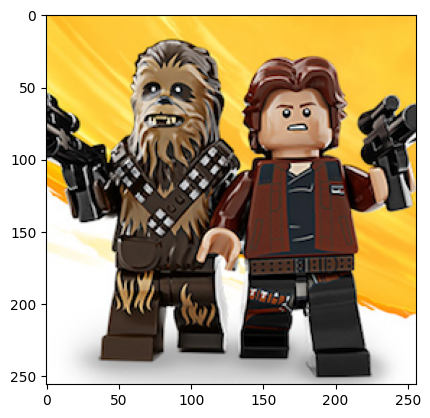

In [7]:
img = plt.imread('/home/ril/img_clust/data/solo-256px.png')
img2 = df2img(img2df(img),256,256)
plt.imshow(img)

In [22]:
import sklearn as sk
from sklearn.cluster import KMeans 

def clust_km(img):
    df = img2df(img)

    km = KMeans(n_clusters=4, random_state=44)
    km.fit(df)

    return km

km = clust_km(img)

/tmp/ipykernel_5167/2040314760.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = matplotlib.cm.get_cmap('tab10', n_clusters)


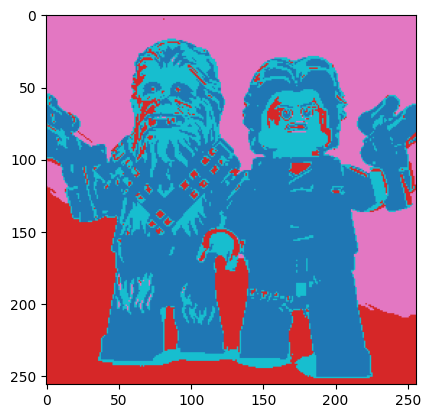

In [25]:
# Définition d'une palette de couleurs, avec des couleurs bien distinctes, choisies en fonction du nombre de clusters
def get_palette(n_clusters):
    colors = matplotlib.cm.get_cmap('tab10', n_clusters)
    palette = []
    for i in range(n_clusters):
        rgb = colors(i)[:3]  # Obtenir les composantes RGB (ignorer l'alpha)
        rgb_255 = tuple(int(255 * c) for c in rgb)  # Convertir en valeurs 0-255
        palette.append(rgb_255)
    return palette

def color_img_by_cluster(img, km):
    h = np.shape(img)[0]
    w = np.shape(img)[1]
    n_clusters = km.n_clusters
    palette = get_palette(n_clusters)
    
    labels = km.labels_
    img_colored = np.zeros((h * w, 3), dtype=np.uint8)
    img_colored[:] = [palette[label] for label in labels]
    img_colored = img_colored.reshape((h, w, 3))

    return img_colored
img_colored = color_img_by_cluster(img, km)
plt.imshow(img_colored)

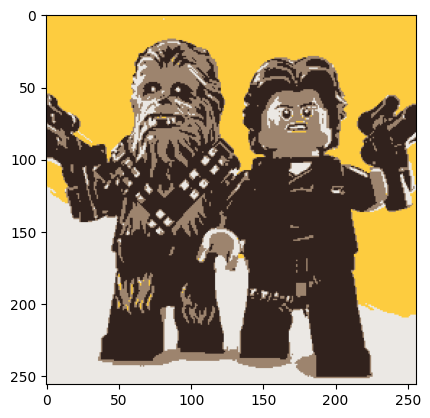

In [26]:
def segmentation(img, km):
    img2 = np.copy(img)
    h = np.shape(img)[0]
    w = np.shape(img)[1]
    for i in range(h):
        for j in range(w):

            idx = i * w + j
            label = km.labels_[idx]
            img2[i, j] = km.cluster_centers_[label]


    return img2

plt.imshow(segmentation(img, km))